In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

df['date'] = pd.to_datetime(df['date'])

df['date'] = (df['date'] - df['date'].min()).dt.days.astype(int)

In [3]:
city_median_prices = df.groupby('city')['price'].median().sort_values()
sorted_cities = city_median_prices.index.tolist()
city_codes = {city: i for i, city in enumerate(sorted_cities)}
df['city_encoded'] = df['city'].map(city_codes)

In [4]:
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [5]:
df

,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,...,yr_built,renovated,yr_renovated,zipcode,city,lat,long,sqm_living15,sqm_lot15,city_encoded
0,0,790000,3,2.50,241.55,441.29,1.0,False,0,4,...,1951,False,1951.0,98117,Seattle,47.6833,-122.400,221.11,441.29,14
1,0,555000,4,2.50,307.51,603.87,2.0,False,0,3,...,2012,False,2012.0,98065,Snoqualmie,47.5150,-121.870,221.11,464.52,17
2,0,440000,4,2.25,200.67,754.28,1.0,False,0,3,...,1966,False,1966.0,98006,Bellevue,47.5443,-122.177,171.87,836.13,21
3,0,295000,2,2.50,151.43,127.09,2.0,False,0,3,...,2009,False,2009.0,98106,Seattle,47.5489,-122.363,147.72,214.23,14
4,0,470000,5,2.50,205.32,896.98,1.0,False,0,3,...,1976,False,1976.0,98011,Bothell,47.7698,-122.222,193.24,802.03,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,377,183000,3,1.00,108.70,680.05,1.0,False,0,3,...,1962,False,1962.0,98188,Seattle,47.4685,-122.282,189.52,680.05,14
19252,377,359000,2,2.75,127.28,105.91,2.0,False,0,3,...,2009,False,2009.0,98133,Seattle,47.7052,-122.343,127.28,101.26,14
19253,378,450000,5,2.00,173.73,682.28,1.5,False,0,3,...,1960,False,1960.0,98007,Bellevue,47.5951,-122.144,173.73,710.71,21
19254,387,445500,2,1.75,129.14,619.66,1.0,False,0,3,...,1941,False,1941.0,98115,Seattle,47.6914,-122.308,85.47,592.72,14


In [6]:
X1 = df['sqm_living'].values.reshape(-1,1)
X2 = df['grade'].values.reshape(-1,1)
X3 = df[['grade', 'sqm_living']]
X4 = df.drop(columns=['price', 'city'])
y = df['price'].values.reshape(-1,1)

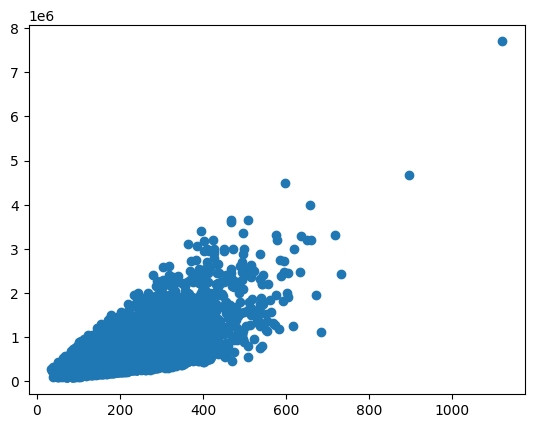

In [7]:
plt.scatter(X1,y)

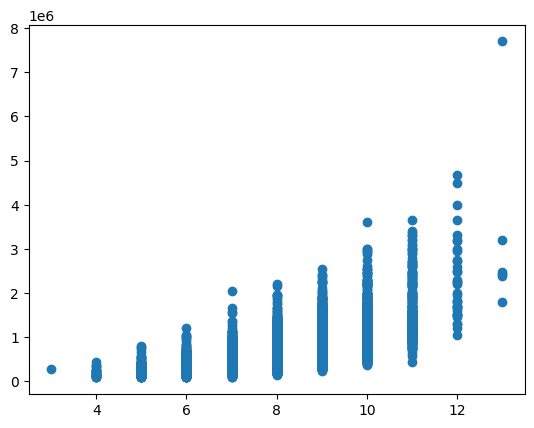

In [8]:
plt.scatter(X2,y)

In [9]:
df_mean_price = df.groupby('grade').agg(mean_price=('price', 'mean'))

<Axes: xlabel='grade', ylabel='mean_price'>

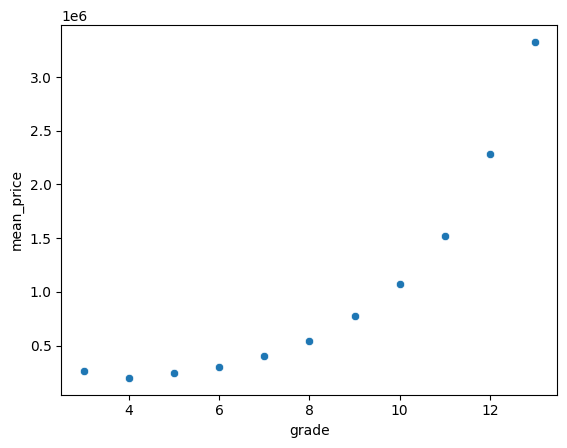

In [10]:
sns.scatterplot(data=df_mean_price, x='grade', y='mean_price')

In [11]:
model = LinearRegression()

0.4700649106288569


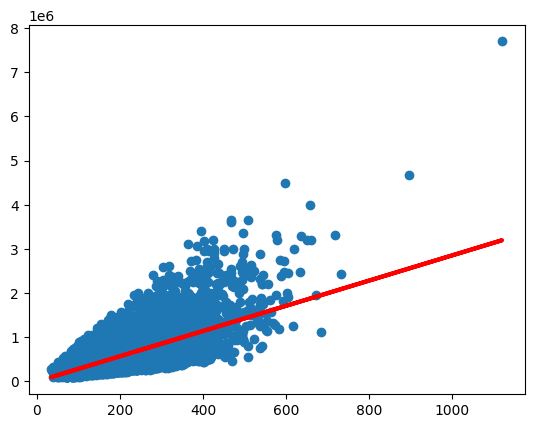

In [12]:
model.fit(X1,y)
print(f"{model.score(X1,y)}")

prediction1 = model.predict(X1)
plt.scatter(X1,y)
plt.plot(X1, prediction1, c="r", lw=3)

0.43724053586845335


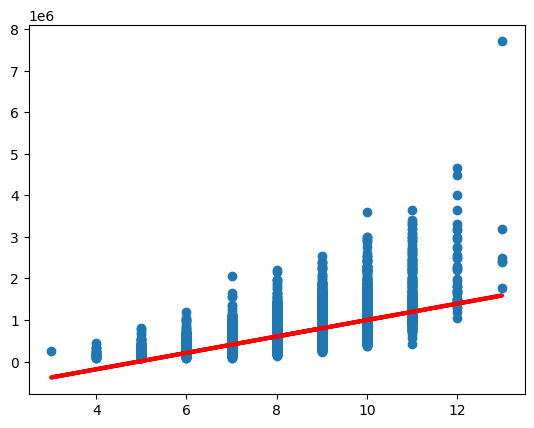

In [13]:
model.fit(X2,y)
print(f"{model.score(X2,y)}")

prediction2 = model.predict(X2)
plt.scatter(X2,y)
plt.plot(X2, prediction2, c="r", lw=3)

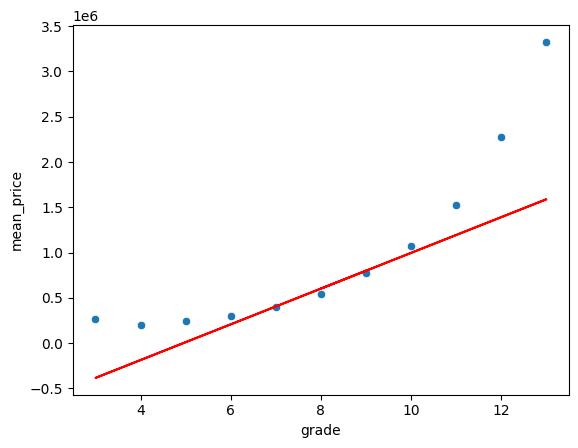

In [14]:
sns.scatterplot(data=df_mean_price, x='grade', y='mean_price')
plt.plot(X2, prediction2, c="r")

In [15]:
model.fit(X3,y)
model.score(X3,y)

0.5223262121808192

In [16]:
model.fit(X4,y)
model.score(X4,y)

0.7262051017234559